In [45]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statsmodels.api as sm

data = pd.read_csv("beauty.csv")

In [46]:
# data
print(data.head())

   tenured  profnumber  minority  age  beautyf2upper  beautyflowerdiv  \
0        0           1         1   36              6                5   
1        1           2         0   59              2                4   
2        1           3         0   51              5                5   
3        1           4         0   40              4                2   
4        0           5         0   31              9                7   

   beautyfupperdiv  beautym2upper  beautymlowerdiv  beautymupperdiv  ...  \
0                7              6                2                4  ...   
1                4              3                2                3  ...   
2                2              3                2                3  ...   
3                5              2                3                3  ...   
4                9              6                7                6  ...   

   nonenglish  onecredit  percentevaluating  profevaluation  students  \
0           0          0       

In [47]:
# Regression

X = data['btystdave']
Y = data['courseevaluation']
X = sm.add_constant(X) # adding a constant
model = sm.OLS(Y, X).fit()
predictions = model.predict(X)
    
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:       courseevaluation   R-squared:                       0.036
Model:                            OLS   Adj. R-squared:                  0.034
Method:                 Least Squares   F-statistic:                     17.08
Date:                Mon, 09 Dec 2019   Prob (F-statistic):           4.25e-05
Time:                        23:02:28   Log-Likelihood:                -375.32
No. Observations:                 463   AIC:                             754.6
Df Residuals:                     461   BIC:                             762.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.0100      0.026    157.205      0.0

In [48]:
const_coef = 4.0100
btystdave_coef = 0.1330

btystdave = data['btystdave']

for row in data:
    predicted_courseevaluation = (const_coef) + (btystdave_coef)*btystdave

print(predicted_courseevaluation)

0      4.036808
1      3.900131
2      3.922176
3      3.908080
4      4.199052
         ...   
458    4.162025
459    4.162025
460    4.054163
461    4.054163
462    4.054163
Name: btystdave, Length: 463, dtype: float64


In [49]:
print(data['courseevaluation'])

0      4.3
1      4.5
2      3.7
3      4.3
4      4.4
      ... 
458    3.2
459    4.3
460    3.3
461    3.2
462    4.1
Name: courseevaluation, Length: 463, dtype: float64


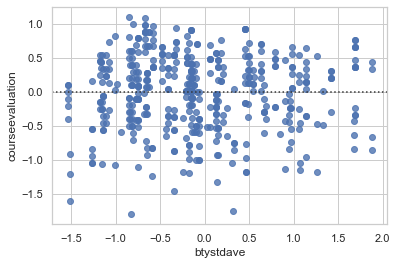

In [50]:
#Residues

sns.residplot(data['btystdave'], data['courseevaluation'])
plt.show()

In [51]:
# Regresion


X = data[['btystdave', 'btystdf2u', 'btystdfl', 'btystdfu', 'btystdm2u', 'btystdml', 'btystdmu']]
Y = data['courseevaluation']
X = sm.add_constant(X) # adding a constant
model = sm.OLS(Y, X).fit()
predictions = model.predict(X)
    
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:       courseevaluation   R-squared:                       0.057
Model:                            OLS   Adj. R-squared:                  0.042
Method:                 Least Squares   F-statistic:                     3.929
Date:                Mon, 09 Dec 2019   Prob (F-statistic):           0.000355
Time:                        23:02:29   Log-Likelihood:                -370.16
No. Observations:                 463   AIC:                             756.3
Df Residuals:                     455   BIC:                             789.4
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.0133      0.026    154.810      0.0

In [52]:
const_coef = 4.0133
btystdave_coef = -1.624e+04
btystdf2u_coef = 2707.3179
btystdfl_coef = 2707.2809
btystdfu_coef = 2707.3710
btystdm2u_coef = 2707.3325
btystdml_coef = 2707.2221
btystdmu_coef = 2707.3722

btystdave = data[['btystdave', 'btystdf2u', 'btystdfl', 'btystdfu', 'btystdm2u', 'btystdml', 'btystdmu']]

for row in data:
    predicted_courseevaluation = (const_coef) + (btystdave_coef)*btystdave + (btystdf2u_coef)*btystdave + (btystdfl_coef)*btystdave +(btystdfu_coef)*btystdave + (btystdm2u_coef)*btystdave + (btystdml_coef)*btystdave + (btystdmu_coef)*btystdave

print(predicted_courseevaluation)

     btystdave  btystdf2u  btystdfl   btystdfu  btystdm2u   btystdml  \
0     4.798724   5.140789  5.797950   7.425996   6.669672   0.506107   
1     0.794392  -2.296683  3.726875   1.764936  -0.397277   0.506107   
2     1.440248   3.281421  5.797950  -2.009102  -0.397277   0.506107   
3     1.027287   1.422054 -0.415276   3.651957  -2.752928   2.795524   
4     9.552103  10.718893  9.940103  11.200037   6.669672  11.953195   
..         ...        ...       ...        ...        ...        ...   
458   8.467289  10.718893  7.869025   5.538976   4.314022  11.953195   
459   8.467289  10.718893  7.869025   5.538976   4.314022  11.953195   
460   5.307169   7.000156  1.655799   9.313015   1.958373   5.084942   
461   5.307169   7.000156  1.655799   9.313015   1.958373   5.084942   
462   5.307169   7.000156  1.655799   9.313015   1.958373   5.084942   

      btystdmu  
0     3.251834  
1     1.462388  
2     1.462388  
3     1.462388  
4     6.830725  
..         ...  
458  10.409616  

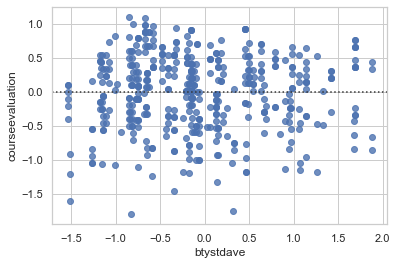

In [53]:
#residuals
sns.residplot(data['btystdave'], data['courseevaluation'])
plt.show()

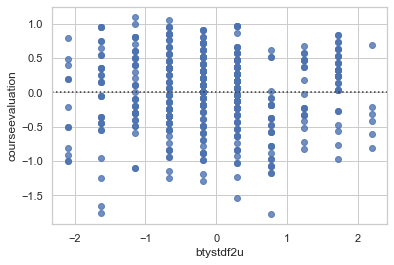

In [54]:
sns.residplot(data['btystdf2u'], data['courseevaluation'])
plt.show()

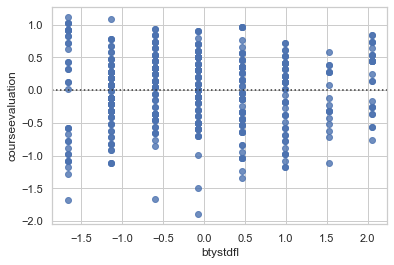

In [55]:
sns.residplot(data['btystdfl'], data['courseevaluation'])
plt.show()

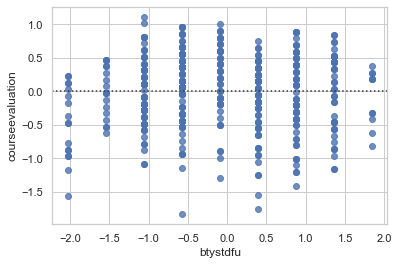

In [56]:
sns.residplot(data['btystdfu'], data['courseevaluation'])
plt.show()

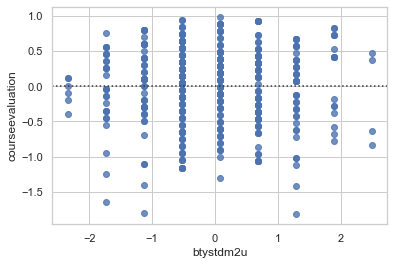

In [57]:
sns.residplot(data['btystdm2u'], data['courseevaluation'])
plt.show()

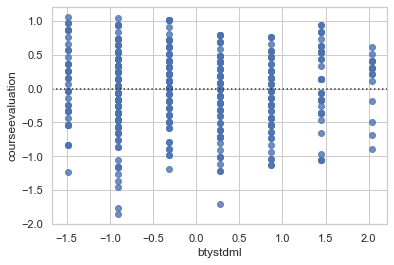

In [58]:
sns.residplot(data['btystdml'], data['courseevaluation'])
plt.show()

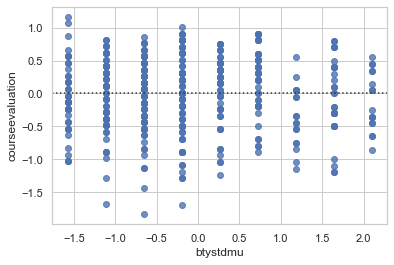

In [59]:
sns.residplot(data['btystdmu'], data['courseevaluation'])
plt.show()